1.Importing Libraries

In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

2.Data Collection

In [2]:
os.getcwd()

'C:\\Users\\vipul'

In [3]:
os.chdir('C:\\Users\\vipul\\OneDrive\\Desktop')

In [4]:
df=pd.read_csv('Unemployment in India.csv')

In [5]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3.EDA Before Preprocessing

In [6]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [7]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [10]:
df.shape

(768, 7)

In [11]:
# Drop rows with missing values
df.dropna(inplace=True)

In [12]:
# Check for missing values
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [13]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [14]:
pd.DataFrame(df.iloc[:,3])

,Estimated Unemployment Rate (%)
0,3.65
1,3.05
2,3.75
3,3.32
4,5.17
...,...
749,7.55
750,6.67
751,15.63
752,15.22


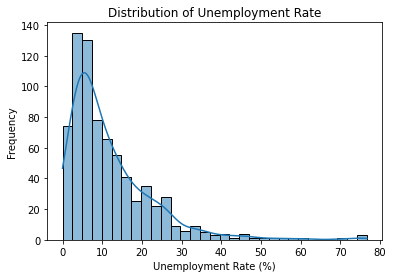

In [15]:
# Visualize the distribution of unemployment rate
sns.histplot(df.iloc[:,3], kde=True)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Drop irrelevant columns
df.drop(['Region', ' Frequency','Area'], axis=1, inplace=True)

In [17]:
# Convert 'Date' column to datetime format
df[' Date'] = pd.to_datetime(df[' Date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0    Date                                     740 non-null    datetime64[ns]
 1    Estimated Unemployment Rate (%)          740 non-null    float64       
 2    Estimated Employed                       740 non-null    float64       
 3    Estimated Labour Participation Rate (%)  740 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 28.9 KB


In [19]:
# Set 'Date' column as index
df.set_index(' Date', inplace=True)

5.EDA After Preprocessing

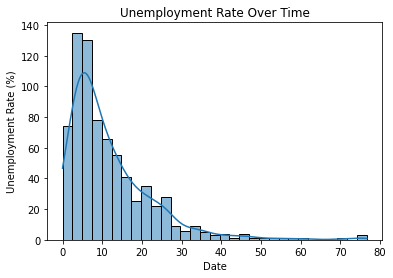

In [20]:
# Plotting time series of unemployment rate
sns.histplot(df[' Estimated Unemployment Rate (%)'], kde=True)
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()

In [21]:
# Define features and target
X = df.drop(' Estimated Unemployment Rate (%)', axis=1)
y = df[' Estimated Unemployment Rate (%)']

In [22]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

7.Model Evaluation

In [24]:
# Predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [25]:
# Evaluation metrics
print("Training MSE:", mean_squared_error(y_train, train_preds))
print("Testing MSE:", mean_squared_error(y_test, test_preds))
print("Training R^2:", r2_score(y_train, train_preds))
print("Testing R^2:", r2_score(y_test, test_preds))

Training MSE: 101.70159014287688
Testing MSE: 139.07514553297295
Training R^2: 0.052121713234500655
Testing R^2: 0.03938840314253944
